In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [3]:
# creating database connection
connection = sqlite3.connect('main.db')

# fetching vendor summary data
df = pd.read_sql_query("select * from sales_stack_summary",connection)
df.head()

,SaleNumber,SaleName,Brand,Description,CostPrice,ActualPrice,Quantity,TotalQuantityPurchased,TotalDollarsPurchased,TotalQuantitySales,TotalDollarsSales,TotalPriceSales,TotalTax,CostFreight,GrossProfit,ProfitMargin,Stocks,PurchaseToSalesRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [4]:
df.to_csv('sales_stack_summary.csv',index  = False)

In [41]:
# Summary statistics for ordinal columns
stastistics = df.describe().T  
display(stastistics)

,count,mean,std,min,25%,50%,75%,max
SaleNumber,8564.0,10107.074965,17635.714818,2.000000,3664.000000,7153.000000,9552.000000,2.013590e+05
Brand,8564.0,17614.670131,12946.130933,58.000000,5375.750000,17606.000000,24935.250000,9.063100e+04
CostPrice,8564.0,21.780897,81.189624,0.360000,6.660000,10.060000,17.850000,3.352930e+03
ActualPrice,8564.0,32.297467,112.420744,0.490000,9.990000,14.990000,25.990000,4.559990e+03
Quantity,8564.0,864.332263,724.240079,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalQuantityPurchased,8564.0,3772.008991,12276.960631,1.000000,42.000000,431.000000,2666.750000,3.376600e+05
TotalDollarsPurchased,8564.0,35887.253324,136722.999153,0.710000,546.187500,5018.400000,26610.177500,3.811252e+06
TotalQuantitySales,8564.0,3748.983419,12125.696083,1.000000,62.000000,490.500000,2675.000000,3.349390e+05
TotalDollarsSales,8564.0,51542.278077,186071.489729,1.980000,1355.580000,8483.780000,40622.112500,5.101920e+06
TotalPriceSales,8564.0,22759.270732,49305.274018,0.990000,584.790000,4549.755000,22595.252500,6.728193e+05


In [43]:
# Mode for each ordinal column
mode = df.mode().iloc[0]
print("\nMode:\n\n", mode)


Mode:

 SaleNumber                               4425.0
SaleName                  MARTIGNETTI COMPANIES
Brand                                       809
Description                    Southern Comfort
CostPrice                                  6.53
ActualPrice                                9.99
Quantity                                  750.0
TotalQuantityPurchased                     12.0
TotalDollarsPurchased                     79.44
TotalQuantitySales                         12.0
TotalDollarsSales                        167.88
TotalPriceSales                           11.99
TotalTax                                   1.35
CostFreight                           144929.24
GrossProfit                               39.96
ProfitMargin                          33.333333
Stocks                                      1.0
PurchaseToSalesRatio                        1.5
UnitPurchasePrice                           1.0
OrderSize                                 Small
Name: 0, dtype: object


# Visualizations

### Filtering the data by removing err and inconsistency data

In [65]:
df = pd.read_sql_query("""SELECT * FROM sales_stack_summary WHERE ProfitMargin > 0 AND GrossProfit > 0
AND TotalQuantitySales > 0""",connection)

### Count Plots for Categorical Columns Histogram

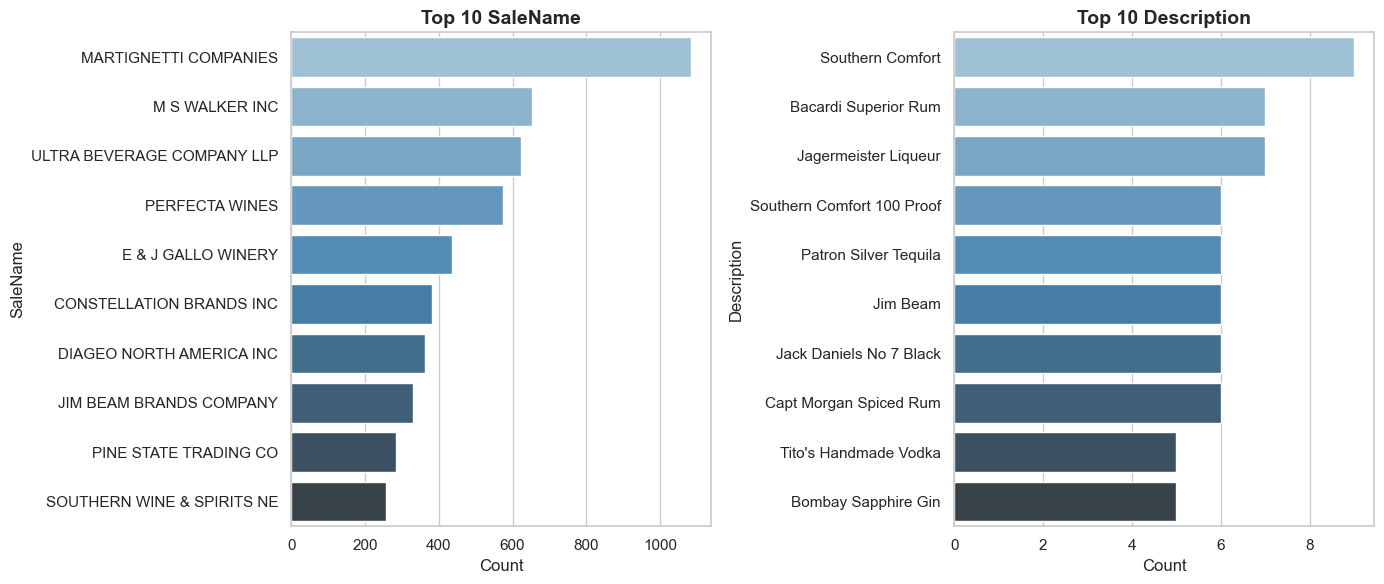

In [66]:
sns.set_theme(style="whitegrid")  # Clean & modern look
cc = ["SaleName", "Description"]
plt.figure(figsize=(14, 6))
for i, col in enumerate(cc):
    plt.subplot(1, 2, i+1)
    top10 = df[col].value_counts().head(10)

    sns.barplot(
        x=top10.values,
        y=top10.index,
        palette="Blues_d"
    ) 
    plt.title(f"Top 10 {col}", fontsize=14, fontweight="bold")
    plt.xlabel("Count")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Correaltion Heatmaps
#### Revenue and profit in this dataset are driven mainly by sales volume, while margins have only a moderate influence

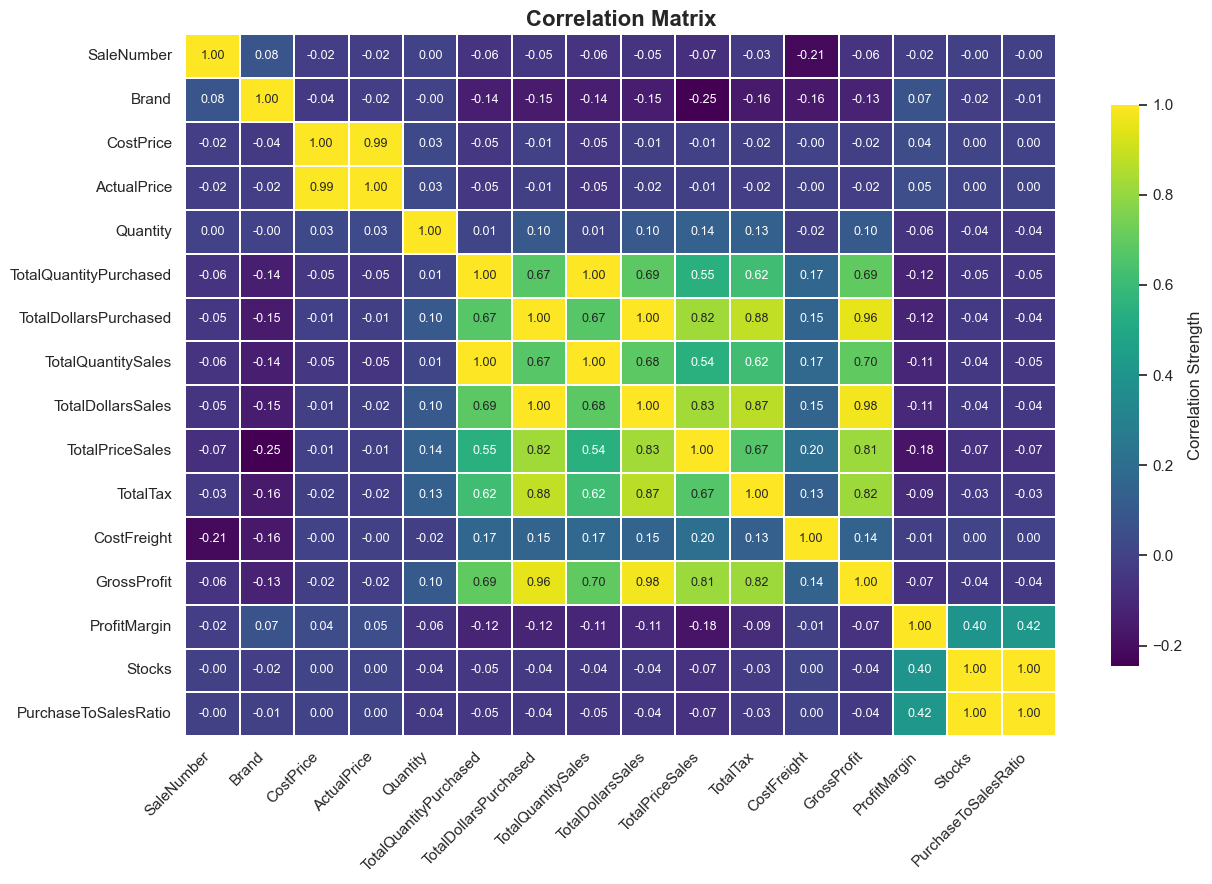

In [67]:
corr = df[numerical_cols].corr()

# Styling
plt.figure(figsize=(13, 9))
sns.set_style("white")

# Create heatmap
ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    linewidths=0.3,
    linecolor="white",
    annot_kws={"size": 9},
    cbar_kws={"shrink": 0.8, "label": "Correlation Strength"}
)

plt.title("Correlation Matrix", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Scatterplot
#### Brands that needs Pricing or advertising Adjustments which showcase higher profit margins but, lower sales performance.

In [69]:
brand_perf = df.groupby('Description').agg({
    'TotalDollarsSales': 'sum', 
    'ProfitMargin': 'mean'  
}).reset_index()

brand_perf.sort_values('ProfitMargin')

,Description,TotalDollarsSales,ProfitMargin
5485,Pepperjack Barossa Red,191.92,0.020842
2954,Flint & Steel Svgn Bl Napa V,119.92,0.033356
2179,Croft Tawny Porto,191.84,0.041701
2561,Douglass Hill Merlot,143.76,0.083472
5385,Parducci 13 True Grit Chard,24927.81,0.121190
...,...,...,...
4568,M Chiarlo Gavi Wh,1208.90,99.393664
657,Beniotome Sesame Shochu,4768.41,99.534226
6449,Skinnygirl Tangerine Vodka,2368.42,99.544844
2411,DiSaronno Amaretto,4781.16,99.553246


In [71]:
# threshold for "low sales" (bottom 15%) and "high margin" (top 15%)
lowsale_threshold = brand_perf['TotalDollarsSales'].quantile(0.15)
highmargin_threshold = brand_perf['ProfitMargin'].quantile(0.85)

# Filter brands with low sales but high profit margins
Focus_brands = brand_perf[
    (brand_perf['TotalDollarsSales'] <= lowsale_threshold) &
    (brand_perf['ProfitMargin'] >= highmargin_threshold)
]
print("Brands with High Profit Margins but Low Sales :")
display(Focus_brands.sort_values('TotalDollarsSales'))

Brands with High Profit Margins but Low Sales :


,Description,TotalDollarsSales,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [73]:
# for better visualization
brand_perf = brand_perf[brand_perf['TotalDollarsSales']<10000] 



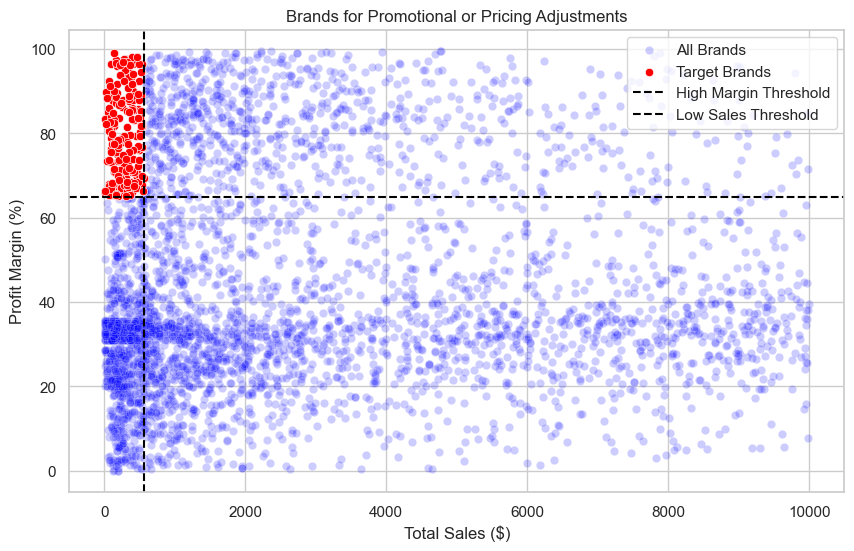

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_perf, x='TotalDollarsSales', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=Focus_brands, x='TotalDollarsSales', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(highmargin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(lowsale_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

### This plot identifies brands that have high profit margins but low sales, making them ideal candidates for pricing or promotional adjustments.

# Histogram
#### Which Seller and brands demonstrate the highest sales performance?

In [76]:
# def fd(value):
#     if value >= 1_000_000:
#         return f"{value / 1_000_000:.2f}M"
#     elif value >= 1_000:
#         return f"{value / 1_000:.2f}K"
#     else:
#         return str(value)

def fd(value):
    if value < 1_000:
        return str(value)
    if value < 1_000_000:
        return "{:.2f}K".format(value / 1_000)
    return "{:.2f}M".format(value / 1_000_000)

In [78]:
# Top Vendors & Brands by Sales Performance
top_Sellers = df.groupby("SaleName")["TotalDollarsSales"].sum().nlargest(10)
top_b = df.groupby("Description")["TotalDollarsSales"].sum().nlargest(10)
top_Sellers

SaleName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalDollarsSales, dtype: float64

In [79]:
top_Sellers.apply(lambda x:fd(x))

SaleName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalDollarsSales, dtype: object

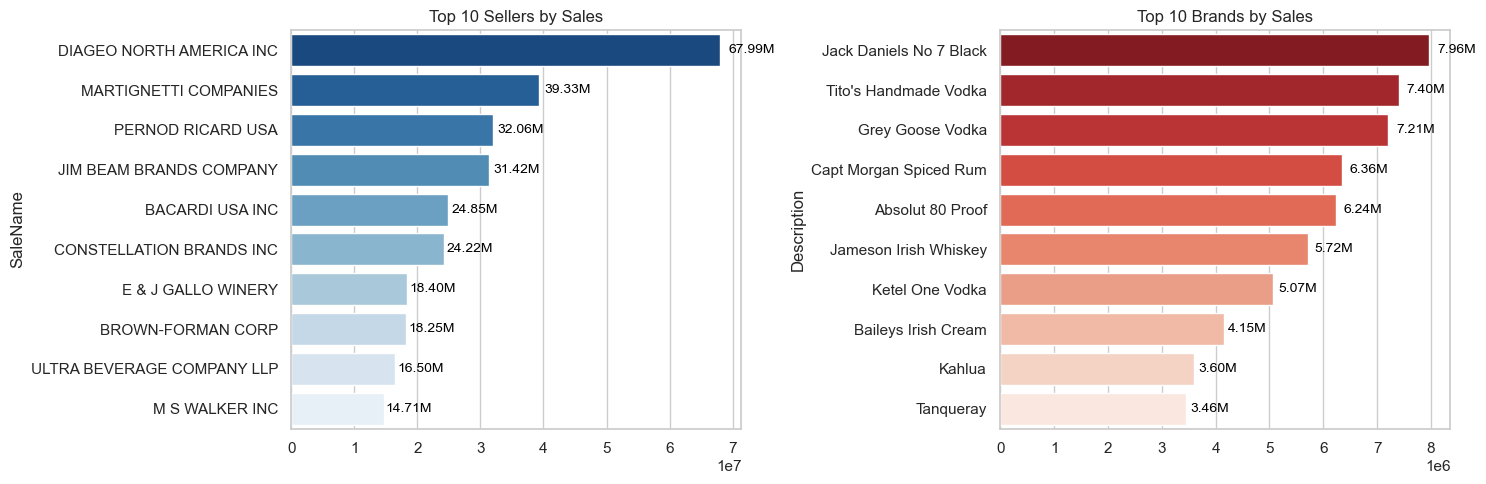

In [80]:
plt.figure(figsize=(15, 5))

# Plot for top_Sellers
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_Sellers.index, x=top_Sellers.values, palette="Blues_r")
plt.title("Top 10 Sellers by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             fd(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

# Plotting for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_b.index.astype(str), x=top_b.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             fd(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Pareto chart
## Leading Vendors by Purchase Contribution

In [89]:
seller_perf = df.groupby("SaleName").agg({
    "TotalDollarsPurchased": "sum",
    "GrossProfit": "sum",
    "TotalDollarsSales":"sum"
}).reset_index()

seller_perf["Seller_Purchase_Share%"] = (seller_perf["TotalDollarsPurchased"] / seller_perf["TotalDollarsPurchased"].sum()) * 100

seller_perf = round(seller_perf.sort_values(by="TotalDollarsPurchased", ascending=False),2)

# Display Top 10 sellers
top_sellers = seller_perf.head(10)
top_sellers['TotalDollarsSales'] = seller_perf['TotalDollarsSales'].apply(fd)
top_sellers['TotalDollarsPurchased'] = seller_perf['TotalDollarsPurchased'].apply(fd)
top_sellers['GrossProfit'] = seller_perf['GrossProfit'].apply(fd)
top_sellers

,SaleName,TotalDollarsPurchased,GrossProfit,TotalDollarsSales,Seller_Purchase_Share%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


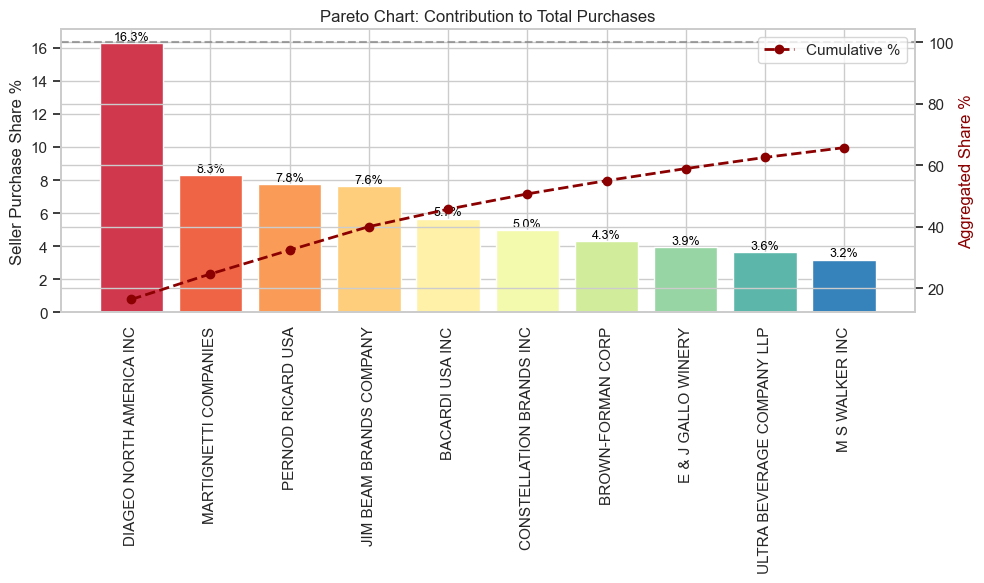

In [93]:
colors = sns.color_palette("Spectral", len(top_sellers))

top_sellers['Aggregated_Share%'] = top_sellers['Seller_Purchase_Share%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot
ax1.bar(
    top_sellers['SaleName'],
    top_sellers['Seller_Purchase_Share%'],
    color=colors
)

# Add labels on bars
for i, value in enumerate(top_sellers['Seller_Purchase_Share%']):
    ax1.text(i, value + 0.2, f"{value:.1f}%", ha='center', fontsize=9, color='black')

# Line plot for Aggregate %
ax2 = ax1.twinx()
ax2.plot(
    top_sellers['SaleName'],
    top_sellers['Aggregated_Share%'],
    color='darkred',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Cumulative %'
)

ax1.set_ylabel('Seller Purchase Share %', fontsize=12)
ax2.set_ylabel('Aggregated Share %', color='darkred', fontsize=12)
ax1.set_xticklabels(top_sellers['SaleName'], rotation=90)
ax1.set_title('Pareto Chart: Contribution to Total Purchases')

ax2.axhline(100, color='gray', linestyle='--', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Pie chart
### Top sellers contributions

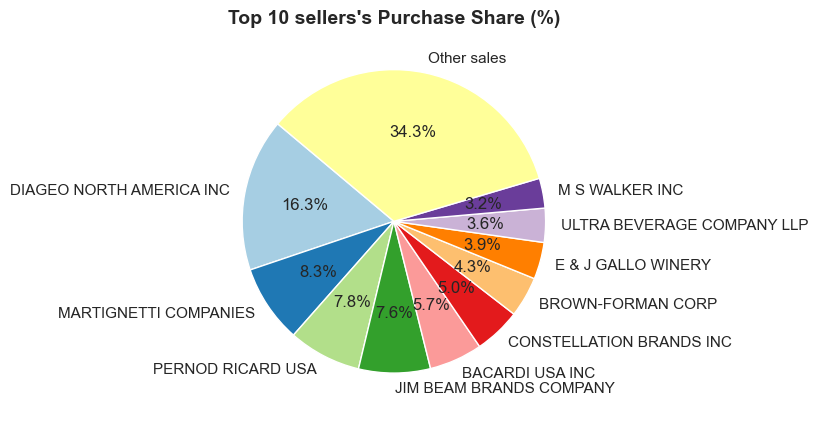

In [99]:
sales = list(top_sellers['SaleName'].values)
pc = list(top_sellers['Seller_Purchase_Share%'].values)

rc = 100 - sum(pc)
sales.append("Other sales")
pc.append(rc)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    pc,
    labels=sales,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)

plt.title("Top 10 sellers's Purchase Share (%)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## This pie chart shows how much each of the top sellers contributes to the total purchase value, including the share from all other sellers.

High-sales group 95% CI: (30.74, 31.61), Mean: 31.18
Low-sales group  95% CI: (40.50, 42.64), Mean: 41.57


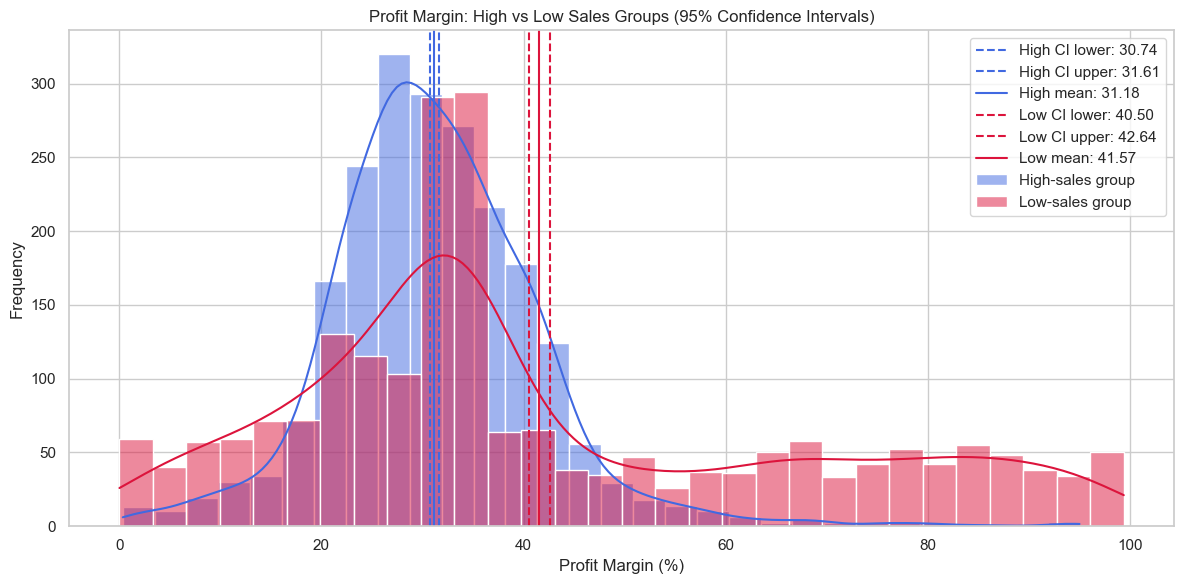

In [103]:
# Split data into high- and low-sales groups (top 25% vs bottom 25% by TotalDollarsSales)
high_sales_cutoff = df["TotalDollarsSales"].quantile(0.75)
low_sales_cutoff  = df["TotalDollarsSales"].quantile(0.25)

high_group_margins = df.loc[df["TotalDollarsSales"] >= high_sales_cutoff, "ProfitMargin"].dropna()
low_group_margins  = df.loc[df["TotalDollarsSales"] <= low_sales_cutoff,  "ProfitMargin"].dropna()

# Helper to compute mean and confidence interval
def get_ci(series, confidence_level=0.95):
    mean_val = np.mean(series)
    std_error = np.std(series, ddof=1) / np.sqrt(len(series))
    t_crit = stats.t.ppf((1 + confidence_level) / 2, df=len(series) - 1)
    margin = t_crit * std_error
    return mean_val, mean_val - margin, mean_val + margin

# Confidence intervals for both groups
high_mean, high_lower, high_upper = get_ci(high_group_margins)
low_mean,  low_lower,  low_upper  = get_ci(low_group_margins)

print(f"High-sales group 95% CI: ({high_lower:.2f}, {high_upper:.2f}), Mean: {high_mean:.2f}")
print(f"Low-sales group  95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Plot distributions with CIs
plt.figure(figsize=(12, 6))

# High-sales group
sns.histplot(high_group_margins, kde=True, color="royalblue", bins=30, alpha=0.5, label="High-sales group")
plt.axvline(high_lower, color="royalblue", linestyle="--", label=f"High CI lower: {high_lower:.2f}")
plt.axvline(high_upper, color="royalblue", linestyle="--", label=f"High CI upper: {high_upper:.2f}")
plt.axvline(high_mean,  color="royalblue", linestyle="-",  label=f"High mean: {high_mean:.2f}")

# Low-sales group
sns.histplot(low_group_margins, kde=True, color="crimson", bins=30, alpha=0.5, label="Low-sales group")
plt.axvline(low_lower, color="crimson", linestyle="--", label=f"Low CI lower: {low_lower:.2f}")
plt.axvline(low_upper, color="crimson", linestyle="--", label=f"Low CI upper: {low_upper:.2f}")
plt.axvline(low_mean,  color="crimson", linestyle="-",  label=f"Low mean: {low_mean:.2f}")

plt.title("Profit Margin: High vs Low Sales Groups (95% Confidence Intervals)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
